# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.
#### EBH (Extra-terrestrial Beam Horizontal): 
Es la radiación solar directa que llegaría a la superficie de la Tierra si la atmósfera no estuviera presente. Representa la radiación solar directa del sol en el espacio.
#### Cloud Opacity (Cloudiness): 
Es la medida de la opacidad de las nubes en el cielo. Indica cuánto del cielo está cubierto por nubes y afecta la cantidad de radiación solar que llega a la superficie.

## Import Libraries

In [55]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas

## Read CSV File

In [56]:
# Cargar los datos del archivo CSV
data = pd.read_csv('DB/solcast.csv', sep=',')

# Crear un dataframe con los datos
df = pd.DataFrame(data)
# Cambiar el nombre de la columna 'dni' a 'DHI'
df = df.rename(columns={'dni': 'DHI'})
# Cambiar el nombre de la columna 'ghi' a 'GHI'
df = df.rename(columns={'ghi': 'GHI'})

# Extraer los 4 caracteres siguientes a la letra 'T' en la columna 'PeriodEnd'
df['Time'] = df['period_end'].str.extract('T(\d{2}:\d{2})')
# Extraer los 10 caracteres anteriores a la letra 'T' en la columna 'PeriodEnd'
df['Date'] = df['period_end'].str.extract('(\d{4}-\d{2}-\d{2})')






print(df.head())

print(df.shape)
df.head(5)  # muestra los 5 primeros registros del dataframe

   air_temp  DHI  GHI            period_end period   Time        Date
0        11    0    0  2023-01-01T01:00:00Z  PT60M  01:00  2023-01-01
1        11    0    0  2023-01-01T02:00:00Z  PT60M  02:00  2023-01-01
2        11    0    0  2023-01-01T03:00:00Z  PT60M  03:00  2023-01-01
3        10    0    0  2023-01-01T04:00:00Z  PT60M  04:00  2023-01-01
4        10    0    0  2023-01-01T05:00:00Z  PT60M  05:00  2023-01-01
(7943, 7)


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_62272/2223222155.py:12: SyntaxWarning: invalid escape sequence '\d'
  df['Time'] = df['period_end'].str.extract('T(\d{2}:\d{2})')
/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_62272/2223222155.py:14: SyntaxWarning: invalid escape sequence '\d'
  df['Date'] = df['period_end'].str.extract('(\d{4}-\d{2}-\d{2})')


,air_temp,DHI,GHI,period_end,period,Time,Date
0,11,0,0,2023-01-01T01:00:00Z,PT60M,01:00,2023-01-01
1,11,0,0,2023-01-01T02:00:00Z,PT60M,02:00,2023-01-01
2,11,0,0,2023-01-01T03:00:00Z,PT60M,03:00,2023-01-01
3,10,0,0,2023-01-01T04:00:00Z,PT60M,04:00,2023-01-01
4,10,0,0,2023-01-01T05:00:00Z,PT60M,05:00,2023-01-01


## Time zone setting all data

In [57]:
# Asegúrate de que la columna 'UTC' es de tipo datetime
df['UTC'] = pd.to_datetime(df['Time'])
# # Configura la zona horaria a UTC
df['UTC'] = df['UTC'].dt.tz_localize('UTC')
# # Convierte a la zona horaria de Colombia
df['Time_Colombia'] = df['UTC'].dt.tz_convert('America/Bogota')
# Convertir la columna 'Time_Colombia' a tipo string
df['Time_Colombia'] = df['Time_Colombia'].astype(str)
# Extraer los 4 caracteres después de los primeros 10 caracteres
df['Extracted'] = df['Time_Colombia'].str.slice(10, 16)
# delete the column 'Time_Colombia'

del df['Time_Colombia']
# delete the column 'UTC'
del df['UTC']
# # delete the column 'Date'
# del df['Date']
# delete the column 'Time'
del df['Time']
#rename the column 'Extracted' to 'Time'
df.rename(columns={'Extracted': 'Time'}, inplace=True)
print(df.shape)
df.head(5)

(7943, 7)


/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_62272/3929416198.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['UTC'] = pd.to_datetime(df['Time'])


,air_temp,DHI,GHI,period_end,period,Date,Time
0,11,0,0,2023-01-01T01:00:00Z,PT60M,2023-01-01,20:00
1,11,0,0,2023-01-01T02:00:00Z,PT60M,2023-01-01,21:00
2,11,0,0,2023-01-01T03:00:00Z,PT60M,2023-01-01,22:00
3,10,0,0,2023-01-01T04:00:00Z,PT60M,2023-01-01,23:00
4,10,0,0,2023-01-01T05:00:00Z,PT60M,2023-01-01,00:00


## Group df for day

In [58]:
# Buscar en la columna "Date" las filas con el valor "2023-01-01"
row_day = df.loc[df['Date'] == '2023-01-01']
print(row_day.shape)


(23, 7)


## Graphs of single-day 

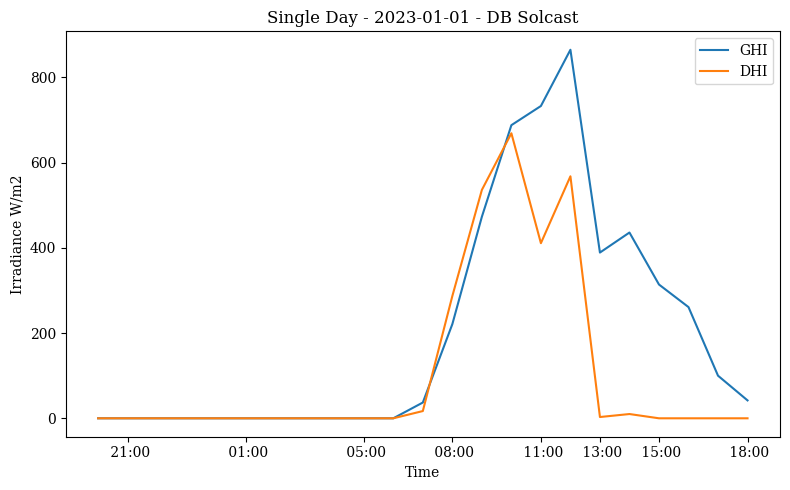

In [59]:
plt.figure(figsize=(8,5))                   # cre figura nueva y configura tamaño
plt.rcParams['font.family'] = 'serif'       # Tipo de letra
# plt.plot(row_day['GHI'], label='GHI EM Solcast', linewidth = 2, color = 'orange') # grafica
plt.title('Single Day - 2023-01-01 - DB Solcast') # titulo
plt.plot(row_day['Time'], row_day['GHI'], label='GHI')
plt.plot(row_day['Time'], row_day['DHI'], label='DHI')

plt.xlabel('Time')                         # Etiqueta eje x
plt.legend()
plt.ylabel('Irradiance W/m2')              # Etiqueta eje y
plt.xticks([1,5,9,12, 15,17,19, 22])                                # leyenda
plt.tight_layout()                          # define la mejor disposiciones de los elementos que conforman la grafica.

## Average of single-day

In [60]:
# Eliminar las filas de 'row_day' que tienen 0 en la columna 'GHI'
row_day = row_day.loc[row_day['GHI'] != 0]
print(row_day.shape)

# Calcular el promedio de los valores en la columna 'GHI'
average_GHI = row_day['GHI'].mean()
print("average_GHI: ", average_GHI)
# # Calcular el promedio de los valores en la columna 'DNI'
# average_DNI = row_day['DNI'].mean()
# print("average_DNI: ", average_DNI)
# Calcular el promedio de los valores en la columna 'DHI'
average_DHI = row_day['DHI'].mean()
print("average_DHI: ", average_DHI)


(12, 7)
average_GHI:  379.9166666666667
average_DHI:  208.41666666666666


## New df with daily information

In [63]:

# Obtener los valores únicos en la columna 'Date'
unique_dates = df['Date'].unique()
# Filtrar los datos donde 'GHI' no es 0
df_filtered = df[df['GHI'] != 0]
# print(df_filtered)
# Encontrar el promedio de 'GHI' para cada fecha única, excluyendo los valores donde 'GHI' es 0
average_GHI_per_date = df_filtered.groupby('Date')['GHI'].mean()
average_DHI_per_date = df_filtered.groupby('Date')['DHI'].mean()
# # average_DNI_per_date = df_filtered.groupby('Date')['DNI'].mean()

# Crear un nuevo DataFrame
new_df = pd.DataFrame({
    'Date': unique_dates,
    'Average_GHI': average_GHI_per_date.values,
    'Average_DHI': average_DHI_per_date.values,
    # 'Average_DNI': average_DNI_per_date.values
})

print(new_df.head())
print(new_df.shape)

         Date  Average_GHI  Average_DHI
0  2023-01-01   379.916667   208.416667
1  2023-01-02   136.000000     0.000000
2  2023-01-03   322.166667    51.500000
3  2023-01-04   340.076923    77.692308
4  2023-01-05   341.083333   206.916667
(331, 3)


## Graph for Daily information

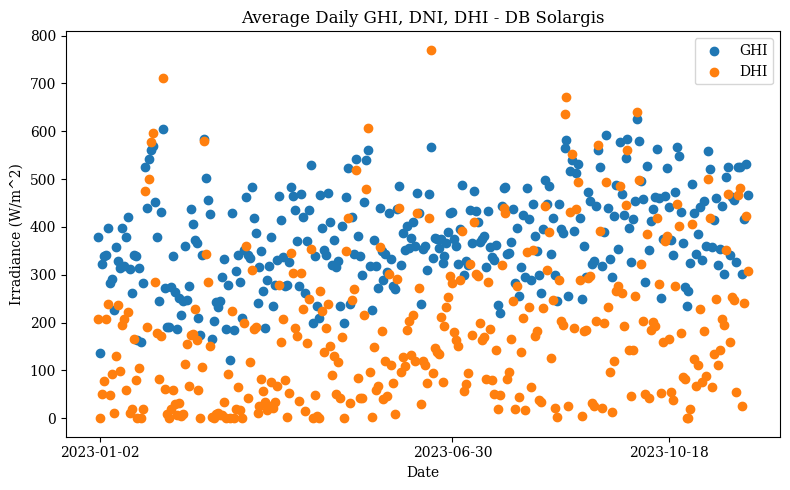

In [64]:
# Crear una figura
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
plt.scatter(new_df['Date'], new_df['Average_GHI'], label='GHI')
# plt.scatter(new_df['Date'], new_df['Average_DNI'], label='DNI')
plt.scatter(new_df['Date'], new_df['Average_DHI'], label='DHI')
# plt.plot(new_df['Date'], new_df['Average_GHI'], label='GHI')
# plt.plot(new_df['Date'], new_df['Average_DNI'], label='DNI')
# plt.plot(new_df['Date'], new_df['Average_DHI'], label='DHI')
plt.title('Average Daily GHI, DNI, DHI - DB Solargis')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
plt.xticks([1,180,290])
plt.tight_layout()



## New df with month information

In [69]:
# print(new_df.head())
# print(new_df.shape)

# Extraer el mes de la columna 'Date'
new_df['Month'] = new_df['Date'].str.split('-').str.get(1)

# # print(new_df.head())
# # print(new_df.shape)

unique_month = new_df['Month'].unique()
# print(unique_month)

# Encontrar el promedio de 'GHI' para cada mes
average_GHI_per_month = new_df.groupby('Month')['Average_GHI'].mean()
average_DHI_per_month = new_df.groupby('Month')['Average_DHI'].mean()
# average_DNI_per_month = new_df.groupby('Month')['Average_DNI'].mean()
# print(average_GHI_per_month)
# print(average_DHI_per_month)
# print(average_DNI_per_month)

# Crear un nuevo DataFrame
new_df2 = pd.DataFrame({
    'Month': unique_month,
    'Average_GHI': average_GHI_per_month.values,
    'Average_DHI': average_DHI_per_month.values,
    # 'Average_DNI': average_DNI_per_month.values
})

print(new_df2.head())


  Month  Average_GHI  Average_DHI
0    01   350.789909   170.656328
1    02   322.925824   135.747253
2    03   298.637717    72.663978
3    04   365.484829   152.932906
4    05   362.276468   175.159843


## Graph for Month

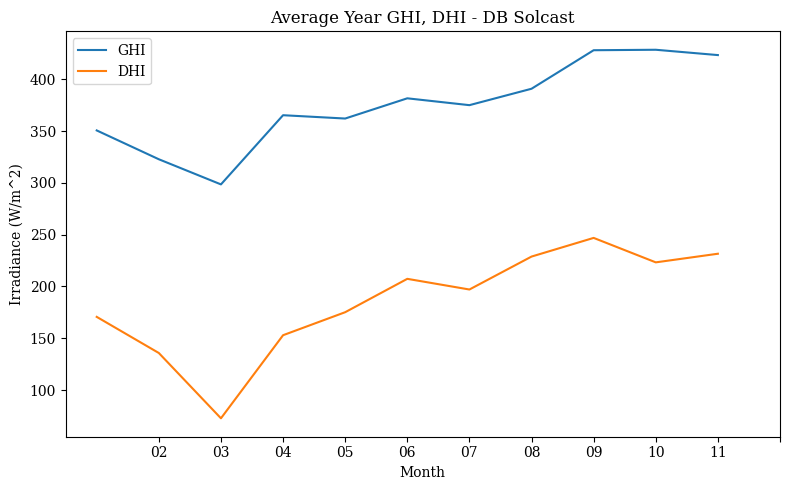

In [71]:
# Crear una figura 
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
# plt.scatter(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
# plt.scatter(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
# plt.scatter(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.plot(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
# plt.plot(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
plt.plot(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.title('Average Year GHI, DHI - DB Solcast')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.tight_layout()
